In [7]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [8]:
#@title Experimentos
M1 = np.zeros((5,5))
M2 = np.zeros(5)
print(M1.shape)
print(M2.shape)
print(type(M1))
print(type(M2))
print(f'Matriz:\n{M1}')
print(f'Vector:\n{M2}')

(5, 5)
(5,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Matriz:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
Vector:
[0. 0. 0. 0. 0.]


In [9]:
#@title .
M_unos = np.ones((5,5))
M_unos

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

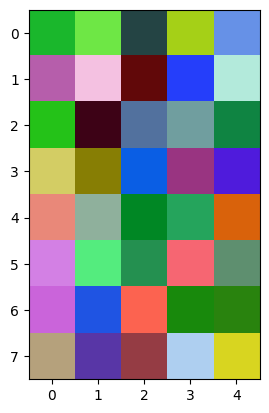

In [10]:
#@title .
imagen = np.random.random((8,5,3))
plt.imshow(imagen)

# Actividad 1. 

Operaciones matricial con regresión lineal.

Cuando se desea hacer una regresion lineal multivariada, existen diferentes formas de realizar la regresión, una de ellas es encontrar el error cuadrático medio y miniminzar el conjunto de parámetros de la regresión emplando algún metodo de minimización, otra forma es encontrar la expresión analítica en forma matricial para enoncontrar el conjunto de parametros de la regresión. En este último caso, la regresion lineal viene dada por la siguiente expresion generalizada:


- $\Theta = (X^T X)^{-1} X^T y$

donte $\Theta$ es la matriz de parametros asociados a la regresión lineal, X la matriz de características y y los valos esperados, así, si tenemos una conjunto de datos en N dimensiones la recta, plano o hyperplano puede ser calculado como:

$Y=\Theta^T X$


En el caso de dos dimensiones, tenemos lo siguiente, Supongamos que X, y Y presentan un comportamiento lineal, y vienen dados por:


- Sea $\vec{X}=x^1, x^2, x^3, x^4, ..., x^m$ 
- Sea $\vec{Y}=y^1, y^2, y^3, y^4, ..., y^m$ 

Para determinar la ecuacion de la recta, hay que conocer los párametros $\theta_0 $, $\theta_1$, que cumplen que :   $y^{i} = \theta_1 x^{i} + \theta_0$ la anterior expresion puede ser escrita como:

\begin{equation}
\begin{bmatrix}
y^{1}\\
y^{2}\\
\vdots\\
y^{m}\\
\end{bmatrix}=
\begin{bmatrix}
\theta_0 & \theta_1 \\
\end{bmatrix}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1^{1} & x_1^{2} & \cdots & x_1^{m} \\
\end{bmatrix}
\end{equation}


Para determinar la matriz de theta entonces se puede aplicar la ecuación:

- $\Theta = (X^T X)^{-1} X^T y$

donde: 
\begin{equation}
X=
\begin{bmatrix}
1 & x_1^{1} \\
1 & x_1^{2} \\
\vdots & \vdots \\
1 & x_1^{m} 
\end{bmatrix}
\end{equation}

y 


\begin{equation}
y=
\begin{bmatrix}
y^1 \\
y^2 \\
\vdots\\
y^m
\end{bmatrix}
\end{equation}

Su tarea será construir un programa que realice la regresión lineal para los siguientes puntos: 
```python 
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise
```



Generalice para el siguiente problema bidimensional: 


```python 
N = 10
x1 = np.linspace(-1, 1, N) 
x2 = np.linspace(-2, 2, N)
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
y = 2*(x1+noise1) - 3*(x2+noise2) + 0.0 #+ 4*np.random.random(100) 

N = 10
X1, X2 = np.meshgrid(x1,x2)
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y)
#scatter = ax.scatter(x1, x2, y,"-")
```


In [11]:
#@title #**Regresión lineal bidimensional**

N = 10 #Valores de N
x1 = np.linspace(0, 10, N) #Vector de N elementos
noise = 2*np.random.random(N)-1 
y = 0.9*x1 + noise  #Puntos a linealizar

unos = np.ones((N))   #Matriz de unos de N por 1
X = np.array((unos,x1)).T  #Matriz X de N por dos, con unos en la primera columna y los x1 en la segunda
inversa = np.linalg.inv((X.T)@X)  #Matriz inversa de la multiplicación de la transpuesta de X con X
theta = inversa@(X.T)@y   #Valores de theta multiplicando la inversa, la transpuesta de X, y los valores de cada y
print(f'X =\n{X},\n\nX Transpuesta =\n{X.T},\n\nInversa=\n{inversa},\n\nValores de theta = {theta}')

X =
[[ 1.          0.        ]
 [ 1.          1.11111111]
 [ 1.          2.22222222]
 [ 1.          3.33333333]
 [ 1.          4.44444444]
 [ 1.          5.55555556]
 [ 1.          6.66666667]
 [ 1.          7.77777778]
 [ 1.          8.88888889]
 [ 1.         10.        ]],

X Transpuesta =
[[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.        ]
 [ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
   6.66666667  7.77777778  8.88888889 10.        ]],

Inversa=
[[ 0.34545455 -0.04909091]
 [-0.04909091  0.00981818]],

Valores de theta = [-0.26486683  0.96303279]


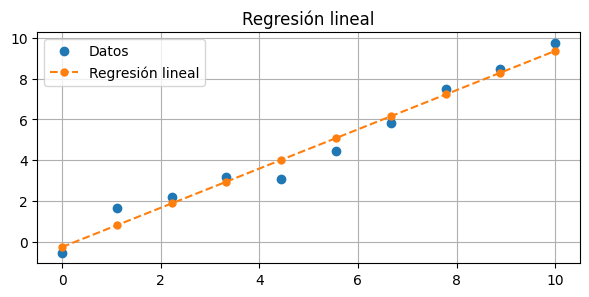

In [12]:
#@title *Graficación*
y_ = theta@(X.T) #Valores de y para la regresión lineal

#GRAFICACIÓN
plt.figure(figsize=(7,3))
plt.title('Regresión lineal')
plt.plot(x1,y,'o', label='Datos')
plt.plot(x1,y_,'.--',markersize=(10),label='Regresión lineal')
plt.legend()
plt.grid()

In [13]:
#@title *Librería gráfica 3D*
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import matplotlib.pyplot as plt

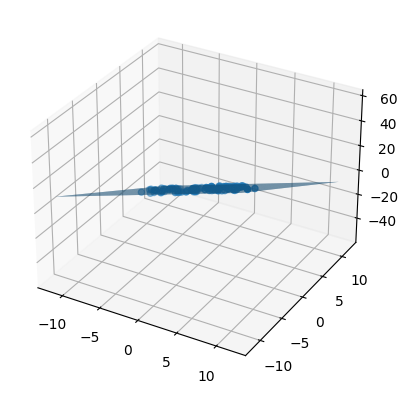

In [14]:
N = 100
noise1 = 2*np.random.random(N)-1
noise2 = 2*np.random.random(N)-1
x1 = np.linspace(-5, 5, N) + noise1
x2 = np.linspace(-2, 2, N) + noise2
y = 2*(x1) - 3*(x2) + 0.0 + 4*np.random.random(100) 

unos = np.ones((N)) 
X = np.array((unos,x1,x2)).T
inversa = np.linalg.inv((X.T)@X) 
theta = inversa@(X.T)@y 

fitting = lambda x1,x2: theta[1]*x1 + theta[2]*x2 + theta[0]


a = np.linspace(2*min(x1), 2*max(x1), 100)
b =np.linspace(2*min(x1), 2*max(x1), 100)
A, B = np.meshgrid(a,b)

Y_ = fitting(A,B)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(A, B, Y_,alpha=0.8)
ax.scatter(x1, x2, y)